# Titanic survived Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# show the columns
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i] = OE.fit_transform(data[i].values.reshape(-1,1))
        
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,0,13.0000,2.0
887,1,1,0.0,19.0,0,0,30.0000,2.0
888,0,3,0.0,NaN,1,2,23.4500,2.0
889,1,1,1.0,26.0,0,0,30.0000,0.0


In [9]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

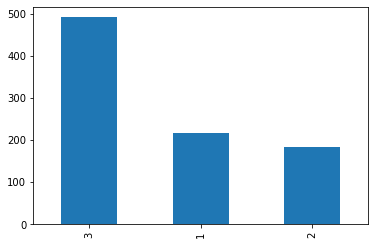

In [10]:
data['Pclass'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Pclass'>

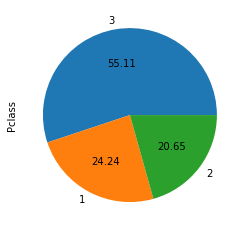

In [11]:
data['Pclass'].value_counts().plot(kind="pie", autopct="%0.2f")

In [12]:
a= data['Pclass'].value_counts()

In [13]:
(a/a.sum())*100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

In [14]:
b=((a/a.sum())*100).values

In [15]:
b

array([55.10662177, 24.24242424, 20.65095398])

In [16]:
c=[]
cf=0
for i in b:
    cf=cf + i
    c.append(cf)

In [17]:
c

[55.106621773288445, 79.34904601571269, 100.0]

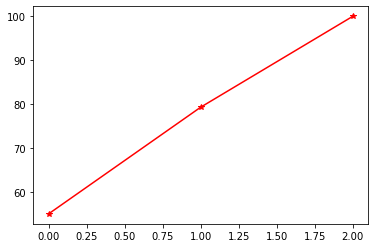

In [18]:
plt.plot(c, marker="*",color='red')

### Histogram

In [19]:
d= data['Age'].values

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

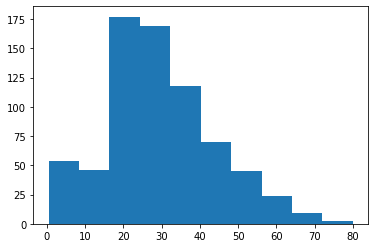

In [20]:
plt.hist(d)

### Boxplot

<AxesSubplot:xlabel='Age'>

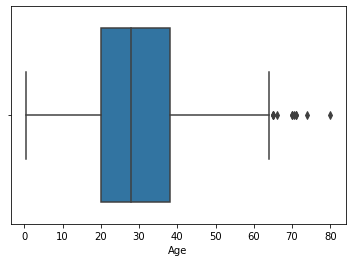

In [21]:
sns.boxplot('Age', data=data)

In [22]:
a=data.dropna(subset=['Age'])
a=a['Age'].values
np.median(a)

28.0

### kde plot

<AxesSubplot:xlabel='Age', ylabel='Density'>

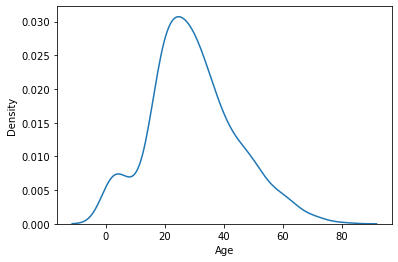

In [23]:
sns.kdeplot(data['Age'])

### Box Plot

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

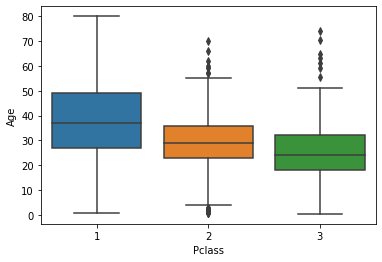

In [24]:
sns.boxplot(x='Pclass',y='Age', data=data)

### barplot

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

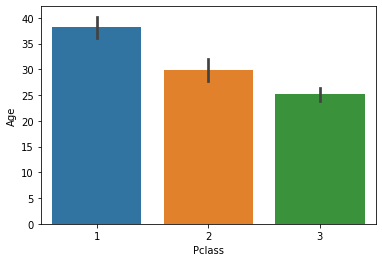

In [25]:
sns.barplot(x='Pclass',y='Age', data=data)

### scatterplot

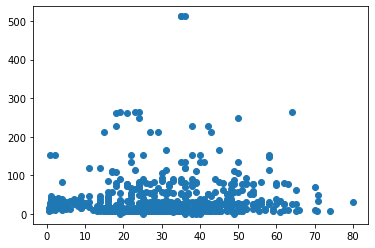

In [26]:
m=data['Age'].values
n=data['Fare'].values

plt.scatter(m,n)

### cross tab

In [27]:
ct=pd.crosstab(data['Pclass'],data['Sex'])

In [28]:
ct

Sex,0.0,1.0
Pclass,,
1,94,122
2,76,108
3,144,347


<AxesSubplot:xlabel='Pclass'>

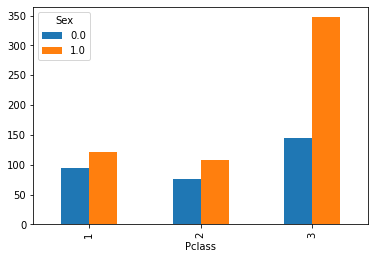

In [29]:
ct.plot(kind='bar')

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

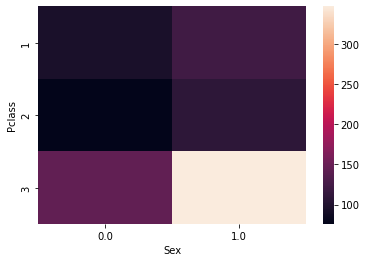

In [30]:
sns.heatmap(ct)

In [31]:
data.drop(columns=['Age','Embarked'], inplace=True)

In [32]:
target = data['Survived']

In [33]:
features=data.drop('Survived' ,axis=1)

In [34]:
features=pd.get_dummies(features)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model=LinearRegression()

In [37]:
model.fit(features, target)

LinearRegression()

In [38]:
predictions=model.predict(features)

In [39]:
print('Accuracy:', np.mean(predictions== target))

Accuracy: 0.0


### Model saving

In [40]:
import pickle
filename = "Titanic survived.pkl"
pickle.dump(model, open(filename, 'wb'))

### Complete project